# Data Preparation
## Data Incompleteness

In [399]:
#HOW TO DETECT MISSING DATA

#FIRST INSPECT YOUR DATA
import pandas as pd
data = pd.read_csv("glass.csv")

- First, we import the `pandas` library using import pandas as pd.
- `pd.read_csv("glass.csv")` is used to load the dataset into a pandas DataFrame. Here, `"glass.csv"` is the file containing the data.
- The loaded dataset is assigned to the variable data, which can be used for further analysis.

In [400]:
data.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
126,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.00,0.00,2
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
80,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.00,0.00,2
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
31,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00,1
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
83,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,2
81,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00,2


In [401]:
print(data.shape)


(214, 10)


In [402]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [403]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

- This command will return the list of column names in the DataFrame.
- It’s useful to confirm that the columns were loaded correctly and to know the names of the variables you’ll be working with.

In [404]:
#data
data.index

RangeIndex(start=0, stop=214, step=1)

- This command returns the index (or row labels) of the DataFrame.
- The index is the identifier for each row in the DataFrame. By default, it starts at 0 and increments by 1 for each row.
- In some datasets, the index might be a meaningful identifier (like a name or ID), but in this case, it's likely the default integer index.

##  Duplicate values

In [405]:
help(pd.DataFrame.duplicated)

Help on function duplicated in module pandas.core.frame:

duplicated(self, subset: 'Hashable | Sequence[Hashable] | None' = None, keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first') -> 'Series'
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.duplicated : Equivalent met

In [406]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

- The `duplicated()` method checks for duplicated rows in the DataFrame.
- It returns a Series of Boolean values (`True` or `False`), where each row is marked as `True` if it is a duplicate of a previous row and `False` otherwise.
- This helps in identifying duplicate records in the dataset, which is important for cleaning the data and ensuring its quality.

In [407]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


- This command filters the DataFrame to display only the rows that are duplicated.
- `data.duplicated()` returns a Boolean Series indicating which rows are duplicates.
- By passing this Boolean Series as a filter (`data[ ... ]`), you get a subset of the DataFrame containing only the duplicate rows.

In [408]:
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset: 'Hashable | Sequence[Hashable] | None' = None, keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : bool, default False
        Whether to drop duplicates in pla

In [409]:
data.drop_duplicates(inplace=True)
print(data.shape)

(213, 10)


- `data.drop_duplicates(inplace=True)` removes duplicate rows from the DataFrame and modifies it directly (since `inplace=True` is specified). Without `inplace=True`, it would return a new DataFrame instead of modifying the original.
- `print(data.shape)` displays the shape of the DataFrame after duplicates are removed. The shape is given as a tuple `(number of rows, number of columns)`.
- By checking the shape, you can confirm if any duplicates were removed by comparing the number of rows before and after using `drop_duplicates()`.

Note: be careful, you don't **always** want to remove duplicates

## Missing Values

In [410]:
data.groupby('Type').mean()  

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,1.518669,13.228261,3.548551,1.173913,72.631449,0.452319,8.786087,0.012899,0.057826
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


- `data.groupby('Type')` groups the DataFrame by the values in the `'Type'` column, which represents the different classifications of glass in your dataset.
- `.mean()` calculates the average (mean) of the numeric columns for each group. This means that for each glass `Type`, you will get the mean of the other attributes such as `RI`, `Na`, `Mg`, etc.
- The result is a new DataFrame where each row corresponds to a unique `Type`, and the columns contain the mean values of the attributes for that `Type`.

This method is useful for summarizing and comparing the characteristics of different glass types.

In [411]:
#Create some missing values
import numpy as np
data.iloc[::3,-1]=np.nan #not a number (to every third element)
data.iloc[::4,0]=np.nan

- `np.nan` is used to create missing values in a dataset (NaN stands for "Not a Number").
- `data.iloc[::3, -1] = np.nan`:

    - `iloc` is used for integer-location based indexing.
    - `::3` selects every 3rd row (starting from the 0th row).
    - `-1` selects the last column (which is `'Type'` in your case).
    - This sets every 3rd value in the `'Type'` column to `NaN`.

- `data.iloc[::4, 0] = np.nan`:

    - `::4` selects every 4th row.
    - `0` selects the first column (which is `'RI'` in this case).
    - This sets every 4th value in the `'RI'` column to `NaN`.
This creates missing values for demonstration or testing purposes, which can be used to practice handling missing data later.

In [412]:
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,NaN,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,NaN
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,NaN
4,NaN,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1.0
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1.0
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,NaN
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1.0
8,NaN,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1.0
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,NaN


In [413]:
#To make detecting missing values easier (and across different array dtypes), 
#pandas provides the isna() and notna() functions, 
#which are also methods on Series and DataFrame objects

type(data['Type'])

pandas.core.series.Series

In [414]:
# Be careful! Missing values might encoded in different ways! 
# E.g. Feature representing average heart beat with observations with value zero

data.isna().any()

RI       True
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type     True
dtype: bool

- The command `data.isna().any()` checks each column of the DataFrame to see if there are any missing values (NaNs).
- It returns a Boolean Series, where each entry corresponds to a column in the DataFrame:

    - `True` indicates that there are missing values in that column.
    - `False` indicates that there are no missing values in that column.

In [415]:
#or you can ask for who is notNAN
data['Type'].notna()

0      False
1       True
2       True
3      False
4       True
       ...  
209     True
210     True
211    False
212     True
213     True
Name: Type, Length: 213, dtype: bool

- This command creates a new DataFrame, `non_missing_types`, that includes only the rows where the `'Type'` column is not missing.
- This filtering is useful for analysis when you want to focus on complete cases.

In [416]:
data.isna().head() #on the entire dataframe

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False


- The command `data.isna()` generates a DataFrame of the same shape as `data`, where each entry is a Boolean value: `True` if the original value is NaN (missing) and `False` otherwise.
- By appending `.head()`, you limit the output to the first 5 rows of this Boolean DataFrame, allowing you to quickly see where the missing values are located across all columns.

In [417]:
#a few comments:
##NA (missing) values are not considered.
##NA groups in GroupBy are automatically excluded

data.groupby("Type").mean()

#In other words, there will never be an “NA group” 
#This was not the case in older versions of pandas

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1.0,1.518676,13.193261,3.546304,1.185652,72.632609,0.459348,8.80413,0.001957,0.06087
2.0,1.518681,13.103000,3.012600,1.423200,72.612600,0.530400,9.08100,0.010000,0.07320
3.0,1.517674,13.387500,3.507500,1.231667,72.511667,0.422500,8.66250,0.012500,0.07250
5.0,1.518822,12.810000,0.667500,1.886250,72.538750,1.255000,10.57500,0.030000,0.06375
6.0,1.517882,14.165000,1.455000,1.433333,73.095000,0.000000,9.72500,0.000000,0.00000
7.0,1.516903,14.467000,0.524500,2.125500,72.912500,0.432000,8.35450,1.109000,0.01500


- This command groups the DataFrame by the `'Type'` column and calculates the mean for all numeric columns for each group.
- Important Note: Rows with missing values (NaNs) in the `'Type'` column are automatically excluded from the grouping. Therefore, any rows that have NaN in the `'Type'` column will not contribute to the calculated means for any of the other columns.

In [418]:
data.groupby("Type").min()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1.0,1.51215,12.56,2.81,0.47,71.35,0.00,7.78,0.0,0.0
2.0,1.51409,11.02,0.00,0.75,70.16,0.00,7.08,0.0,0.0
3.0,1.51610,12.16,3.36,0.65,71.36,0.06,8.32,0.0,0.0
5.0,1.51316,11.56,0.00,1.40,70.48,0.32,6.96,0.0,0.0
6.0,1.51299,13.79,0.00,0.56,72.37,0.00,7.59,0.0,0.0
7.0,1.51508,11.95,0.00,1.19,70.26,0.00,5.43,0.0,0.0


- This command groups the DataFrame by the `'Type'` column and calculates the minimum value for all numeric columns for each group.
- Similar to the previous grouping with `mean()`, any rows with NaN values in the `'Type'` column will be automatically excluded from this calculation. Thus, there will be no "NA group" in the results.

In [419]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,NaN,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,NaN
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,NaN
4,NaN,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,NaN,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,NaN
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


## Some alternatives to deal with missing values 

## 1. Drop 
### Importing Data & Creating NaN Values

In [420]:
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv("glass.csv")
# Introduce NaN values in every third element of the last column
data.iloc[::3, -1] = np.nan # Set every third element in the last column to NaN

### Drop Rows where at least one element is missing:

In [421]:
# Drop rows where at least one element is missing
data_drop_rows = data.dropna(axis=0) # axis=0 drops rows with NaN values
print("Data after dropping rows with NaN:")
print(data_drop_rows.shape)
data_drop_rows.head()

Data after dropping rows with NaN:
(142, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1.0
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1.0
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1.0


### Drop Columns where at least one element is missing:

In [422]:
# Drop columns where at least one element is missing
data_drop_columns = data.dropna(axis=1)
print("Data after dropping columns with NaN:")
print(data_drop_columns.shape)
data_drop_columns.head()

Data after dropping columns with NaN:
(214, 9)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### Drop Rows where all elements are missing:

In [423]:
# Drop rows where all elements are missing
data_drop_all = data.dropna(how='all')
print("Data after dropping rows where all elements are NaN:")
print(data_drop_all.shape)
data_drop_all.head()

Data after dropping rows where all elements are NaN:
(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,NaN
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,NaN
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


### Drop rows based on specific columns (subset argument):

In [424]:
# Drop rows based on specific columns (subset)
data_drop_subset = data.dropna(subset=['RI', 'Type'])
print("Data after dropping rows where 'RI' or 'Type' is NaN:")
print(data_drop_subset.shape)
data_drop_subset.head()

Data after dropping rows where 'RI' or 'Type' is NaN:
(142, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1.0
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1.0
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1.0


### Modify the DataFrame in-place (inplace=True):

In [425]:
# Drop NaN values in-place (no new DataFrame)
data.dropna(inplace=True)
print("Original data after inplace dropna:")
print(data.shape)
data.head()

Original data after inplace dropna:
(142, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1.0
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1.0
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1.0


### 2. SUBSTITUTION:  (Be careful using this approach!)

How to use "fillna" to replace missing values

In [426]:
data = pd.read_csv("glass.csv")

data.iloc[::3,-1]=np.nan # Introduce NaN values in every third element of the last column

data_filled = data.fillna(999) # Fill NaN values with 999 (this returns a new DataFrame)

# Print original data and filled data for comparison
print("Original data with NaN values:")
data.head()

Original data with NaN values:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,NaN
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,NaN
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [427]:
print("\nData after filling NaN with 999:")
data_filled.head()


Data after filling NaN with 999:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,999.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,999.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [428]:
#if I want to replace with different rules in different columns
data.iloc[::4,0]=np.nan #not a number (to every forth element)
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,NaN,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,NaN
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,NaN
4,NaN,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,NaN
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,NaN,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [429]:
values = {'Type': 33} #you can add more rules here for the other columns
data.fillna(value=values).head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,NaN,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,33.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,33.0
4,NaN,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [430]:
values = {'Type':999, "RI": -1} #you can add more rules here for the other columns
data.fillna(value=values)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,-1.00000,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,999.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,999.0
4,-1.00000,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,999.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,-1.00000,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [431]:
data.fillna(data.mean()[["Type"]])#replace missing value with the column mean


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,NaN,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,2.78169
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.00000
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.00000
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,2.78169
4,NaN,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.00000
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.00000
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,2.78169
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.00000
212,NaN,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.00000


In [432]:
#data.head()
data.fillna(data.mean()["RI":"Type"])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.518542,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,2.78169
1,1.517610,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.00000
2,1.516180,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.00000
3,1.517660,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,2.78169
4,1.518542,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.00000
...,...,...,...,...,...,...,...,...,...,...
209,1.516230,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.00000
210,1.516850,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,2.78169
211,1.520650,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.00000
212,1.518542,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.00000


### 3. Can you think of another way?

In [433]:
data = pd.read_csv("glass.csv")


In [434]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [435]:
# Missingness in Na depends on value of Na

data.loc[data['Na'] > 14, 'Na'] = np.nan

<AxesSubplot:xlabel='Na', ylabel='Count'>

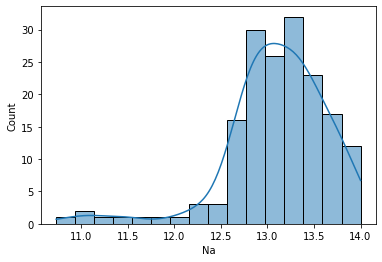

In [436]:
# Na
import seaborn as sns

sns.histplot(data=data, x="Na", kde=True)

In [437]:
# Missingness in Mg depends on value of Al

probabilities = (data['Al'] - data['Al'].min()) / (data['Al'].max() - data['Al'].min())
probabilities = probabilities**2

random_values = np.random.uniform(0, 1, len(data))
data.loc[random_values < probabilities, 'Mg'] = np.nan

# indicator variable

data['Mg_missing_indicator'] = data['Mg'].isnull().astype(int)

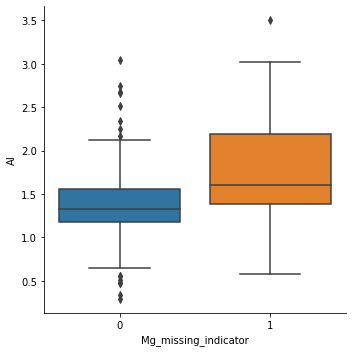

In [438]:
sns.catplot(data=data, x="Mg_missing_indicator", y="Al", kind="box")

<AxesSubplot:xlabel='Al', ylabel='Mg_missing_indicator'>

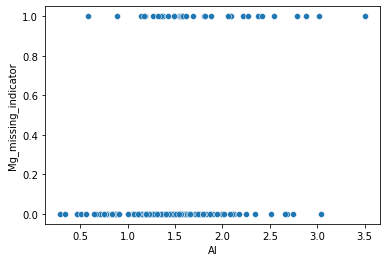

In [439]:
sns.scatterplot(data=data, x="Al", y="Mg_missing_indicator")